## Bank Marketing Campaign

### Life cycle of Machine Learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1. Problem Statement
- The dataset consists of bank client data along with information related to the last contact of the current marketing campaign, as well as social and economic context attributes.
- The objective is to predict whether a client will subscribe to a term deposit or not.
- Given the features such as client demographics, job information, contact communication type, and economic indicators, the model should effectively learn patterns and relationships to make accurate predictions about the likelihood of a client subscribing to a term deposit.

### 2. Data Collection
- Dataset Source - [https://archive.ics.uci.edu/dataset/222/bank+marketing](https://archive.ics.uci.edu/dataset/222/bank+marketing)

#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Importing dataset

In [2]:
df = pd.read_csv("../data_given/bank-additional-full.csv")
df.shape

(41188, 21)

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.drop_duplicates(inplace=True)

We dropped all duplicates values.

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [7]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [8]:
numeric_variables = []
categorical_variables = []

for col in df.columns:
    if df[col].dtypes =="O":
        categorical_variables.append(col)
    else:
        numeric_variables.append(col)
        
print(f"Numeric Variables {numeric_variables}\nCategorical Variables {categorical_variables}")

Numeric Variables ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical Variables ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [9]:
print("Columns : No. of unique values -> Unique Values\n")
for col in categorical_variables:
    print(f"{col} : {len(df[col].unique())} -> {df[col].unique()}\n")

Columns : No. of unique values -> Unique Values

job : 12 -> ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital : 4 -> ['married' 'single' 'divorced' 'unknown']

education : 8 -> ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default : 3 -> ['no' 'unknown' 'yes']

housing : 3 -> ['no' 'yes' 'unknown']

loan : 3 -> ['no' 'yes' 'unknown']

contact : 2 -> ['telephone' 'cellular']

month : 10 -> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week : 5 -> ['mon' 'tue' 'wed' 'thu' 'fri']

poutcome : 3 -> ['nonexistent' 'failure' 'success']

y : 2 -> ['no' 'yes']



In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
def piechart(col1):
    fig, ax = plt.subplots(1, 2, figsize=(12,12))
    ax[0].pie(x=df[col1].value_counts().sort_index().values, labels=df[col1].value_counts().sort_index().index, autopct="%1.1f%%")
    ax[0].set_title(f"{col1.capitalize()} Distribution of Population")
    ax[1].pie(x=df[df['y']=='yes'][col1].value_counts().sort_index().values, labels=df[df['y']=='yes'][col1].value_counts().sort_index().index, autopct="%1.1f%%")
    ax[1].set_title(f"{col1.capitalize()} Distribution of Term Deposit Subscriber")
    plt.tight_layout()
    plt.show()

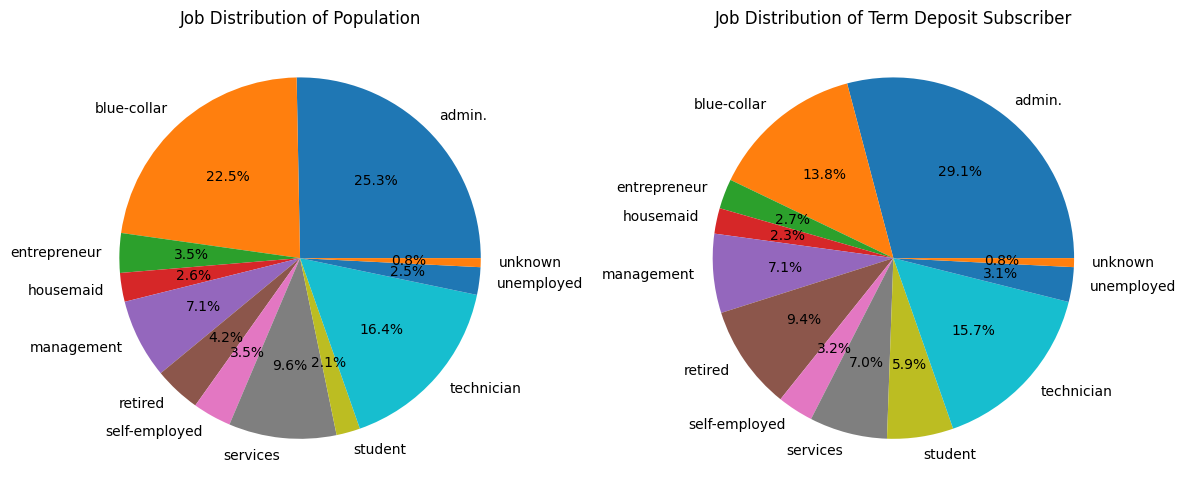

In [12]:
piechart('job')

- We should concentrate more towards blue collar jobs because in total population, its proportion is around 22.5% but in term deposit subscribers, its proportion is around 13.8%.

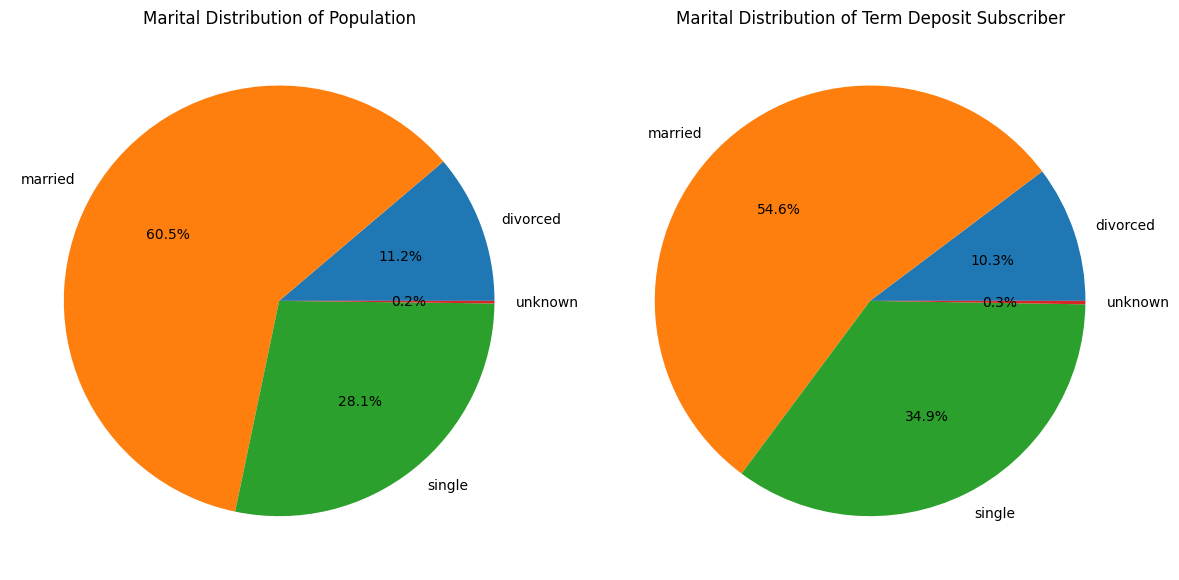

In [13]:
piechart('marital')

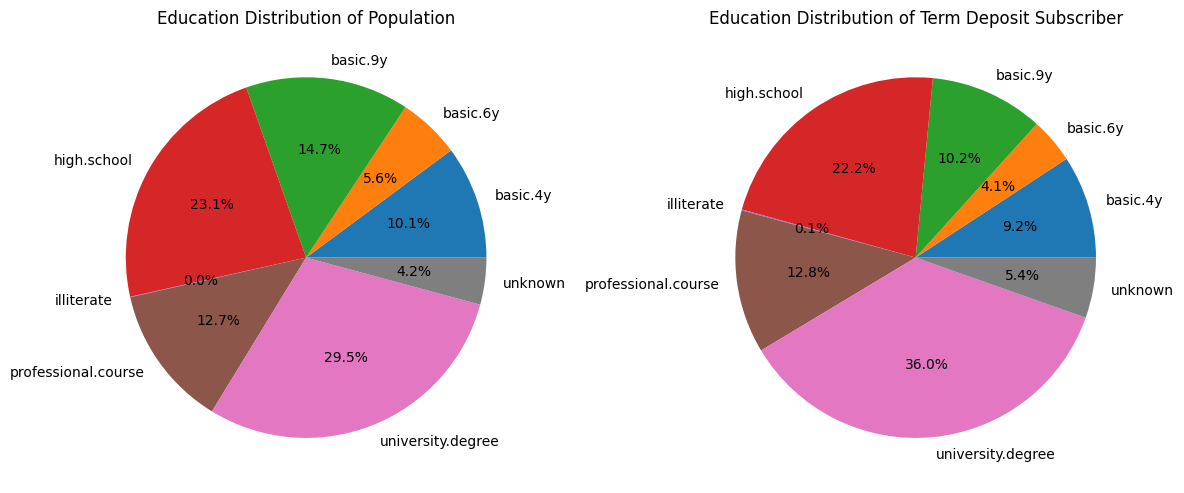

In [14]:
piechart('education')

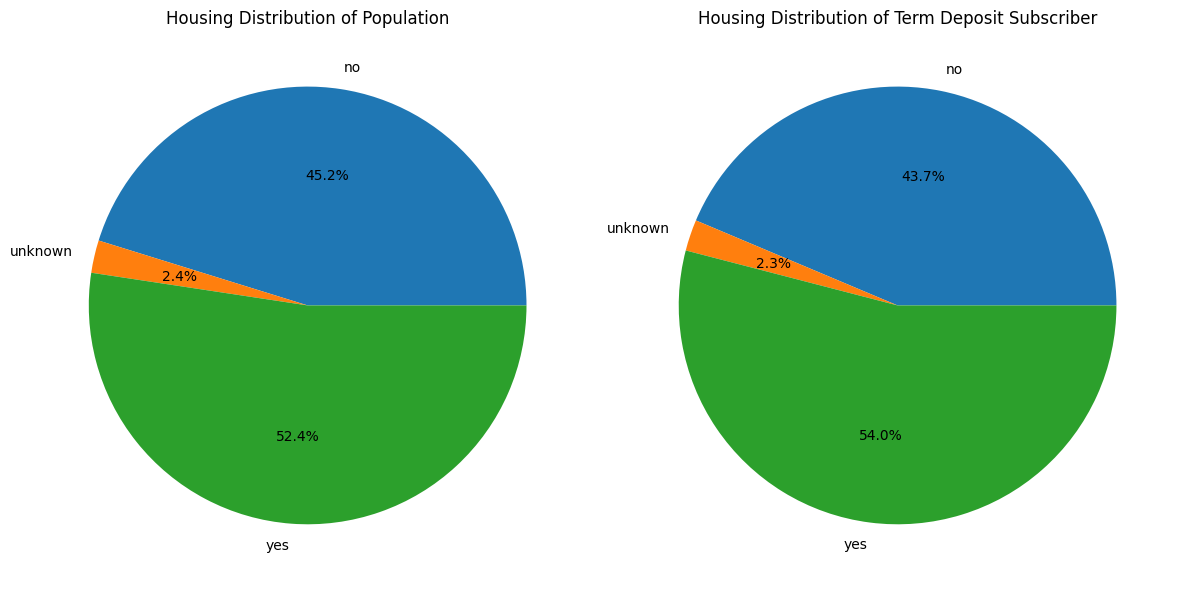

In [15]:
piechart('housing')

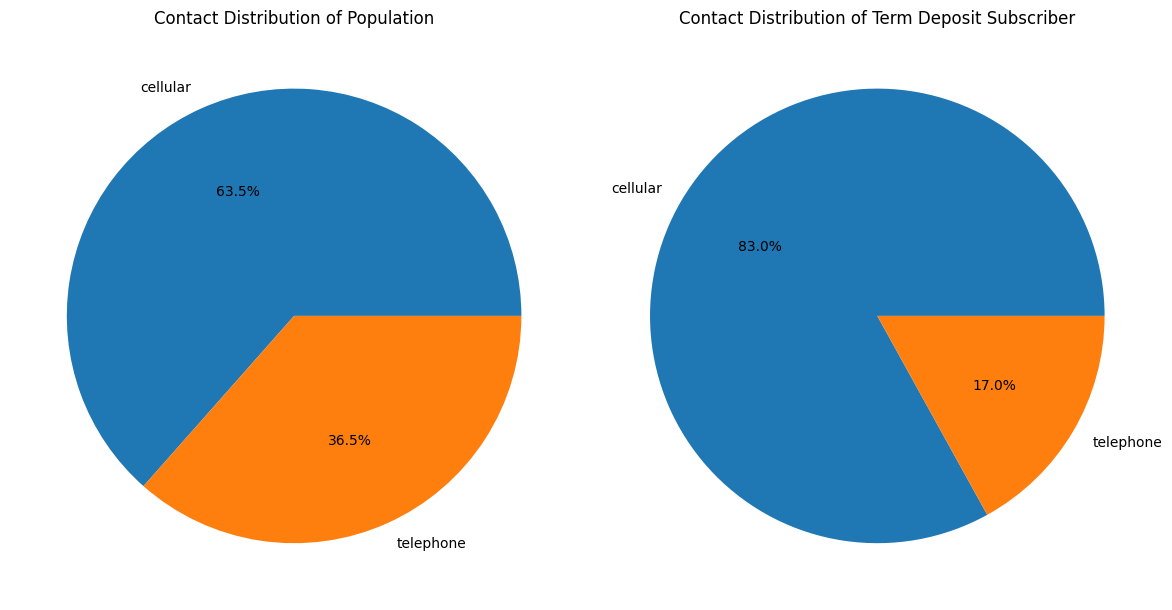

In [16]:
piechart('contact')

- We can observe there are more chances of customer to become term deposit subscriber if we call on his cellular phone instead of telphone.

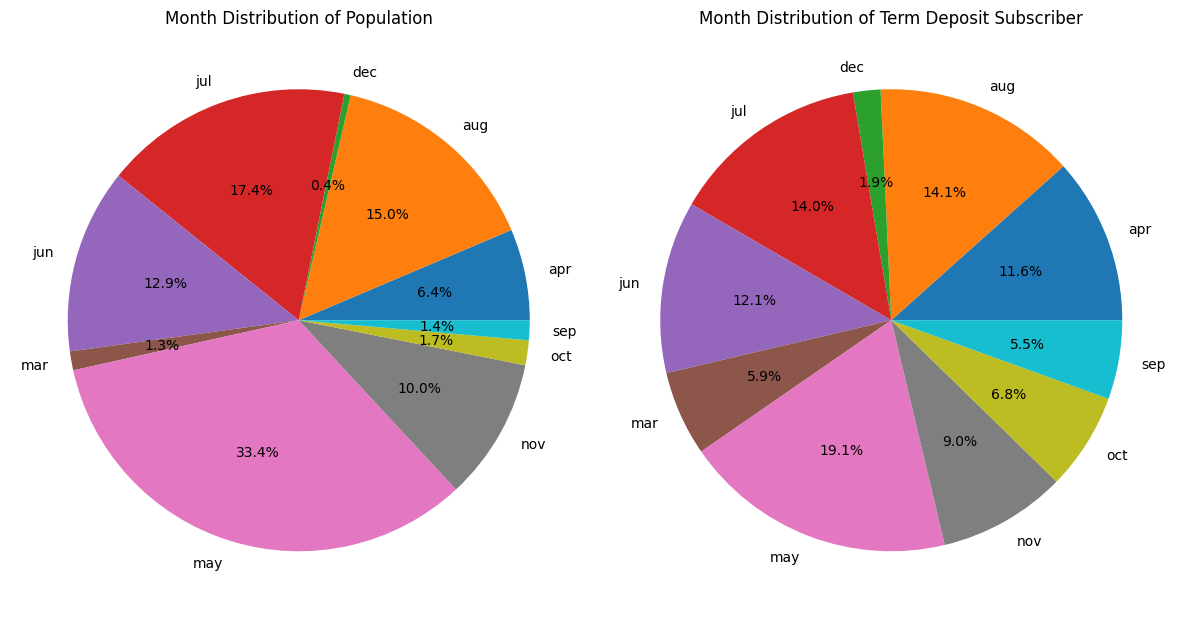

In [17]:
piechart('month')

In [18]:
def histogram(dataframe, col):
    df1 = dataframe[dataframe['y']=='yes']
    fig, ax = plt.subplots(1, 2, figsize=(16,8))
    sns.histplot(data=dataframe, x=col,bins=30, kde=True, ax=ax[0])
    ax[0].set_title(f"{col.capitalize()} Distribution of Population")
    sns.histplot(data=df1, x=col,bins=30, kde=True, ax=ax[1])
    ax[1].set_title(f"{col.capitalize()} Distribution of Term Deposit Subscriber")
    plt.show()

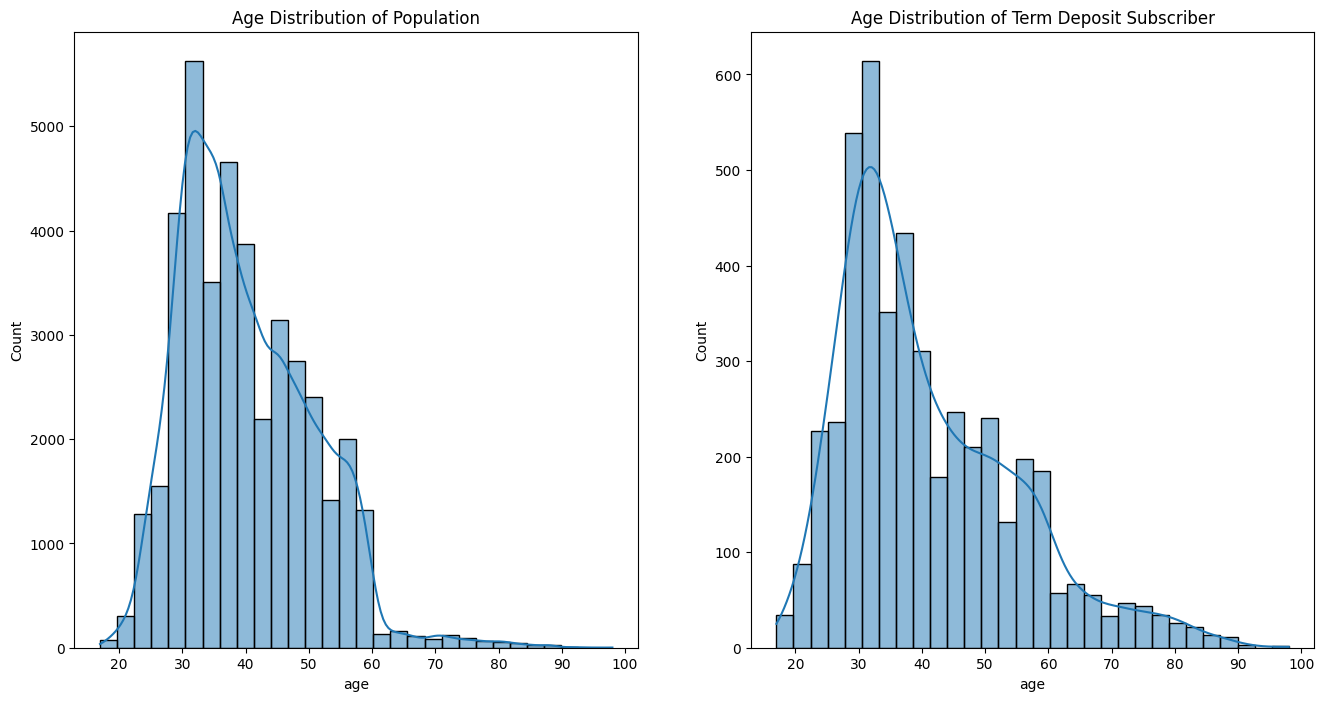

In [19]:
histogram(df,'age')

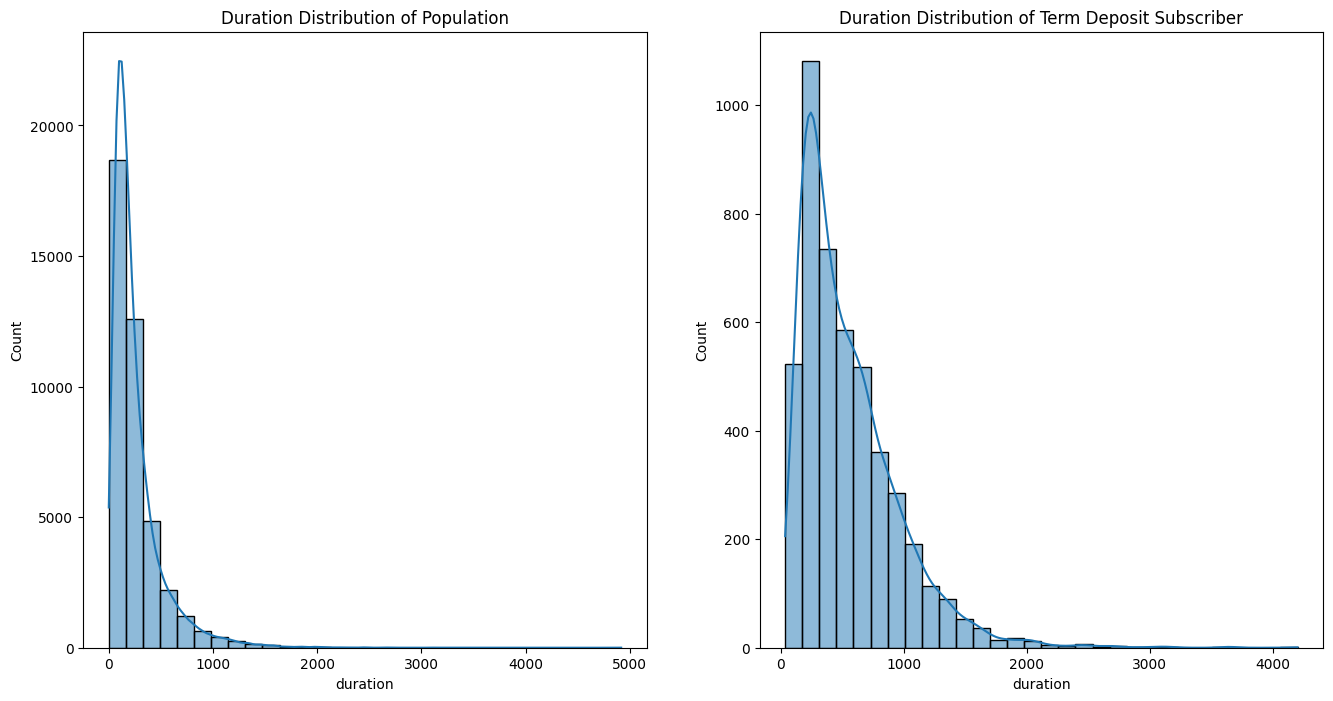

In [20]:
histogram(df,'duration')

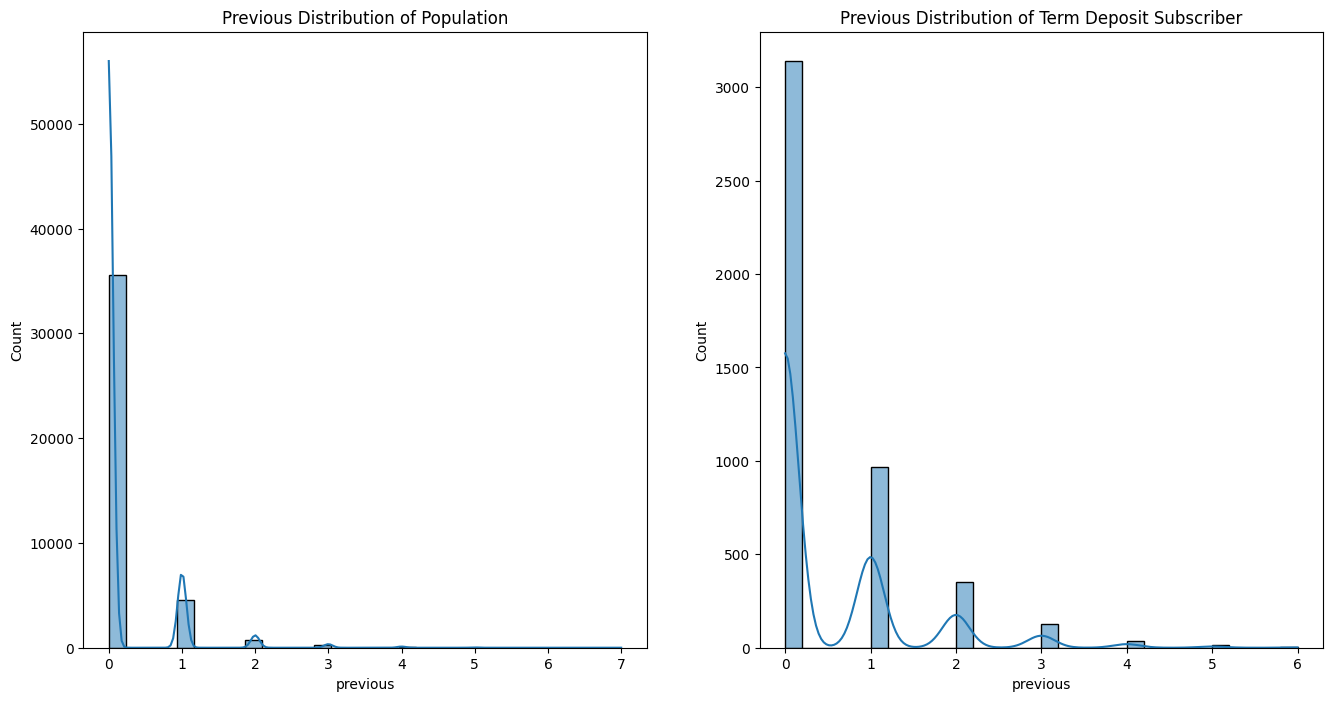

In [21]:
histogram(df,'previous')

In [22]:
def heatmap_analysis(col1,col2):
    df1 = df.groupby([col1,col2]).size().unstack()
    plt.figure(figsize=(10,6))
    sns.heatmap(df1, cmap='Blues', annot=True, fmt="d")
    plt.xlabel(f"{col2}")
    plt.ylabel(f"{col1}")
    plt.title(f"Analysis among {col2.capitalize()} and {col1.capitalize()} Columns")
    plt.show()

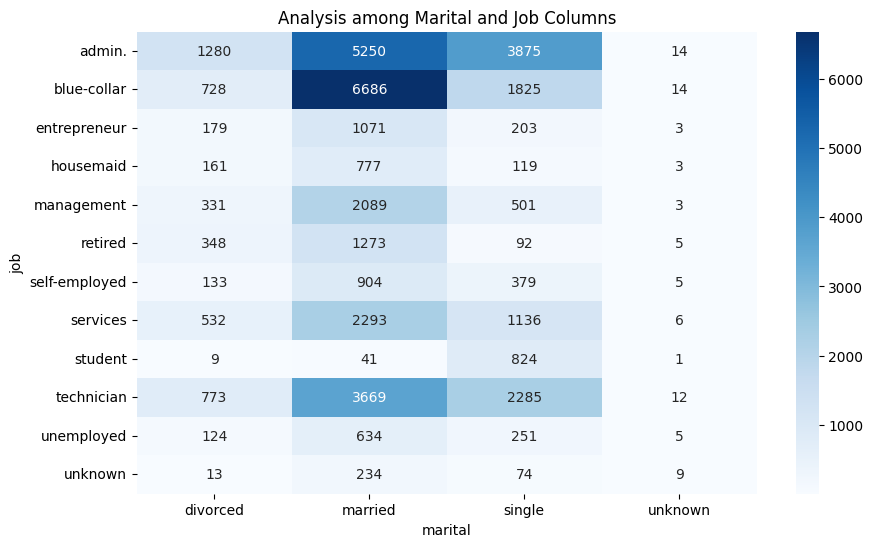

In [23]:
heatmap_analysis("job","marital")

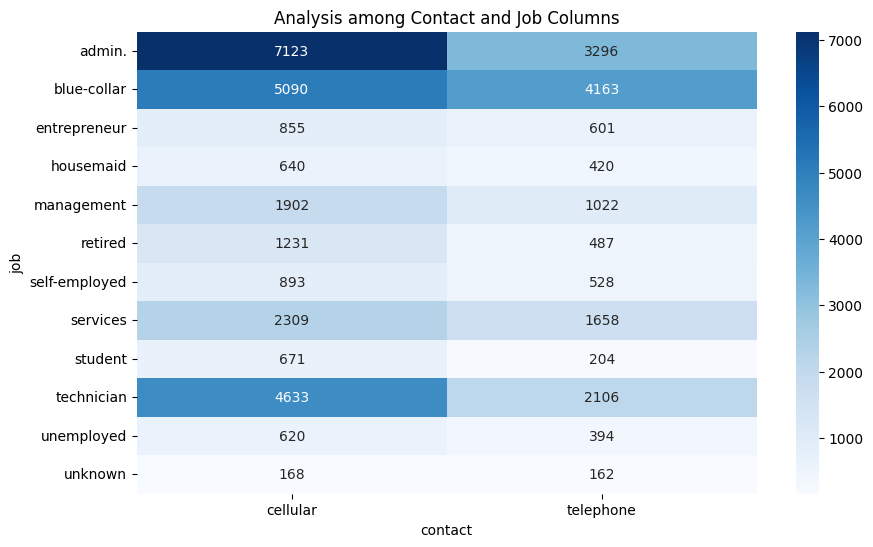

In [24]:
heatmap_analysis("job","contact")

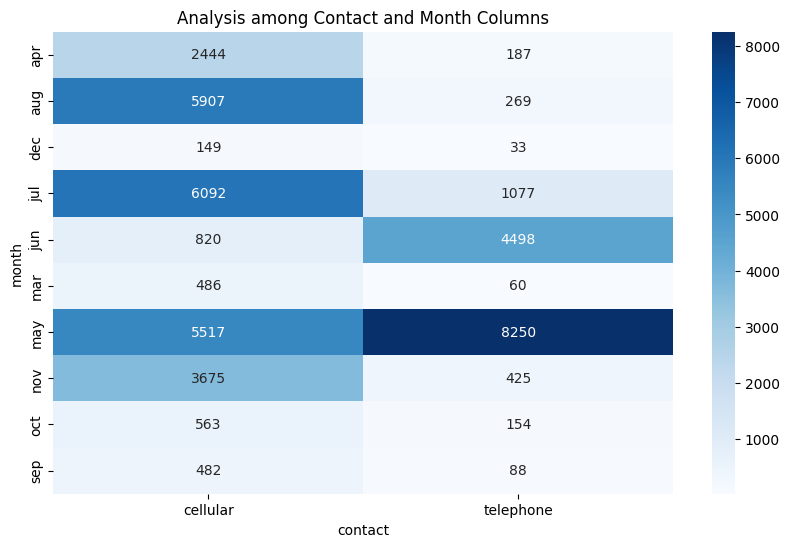

In [25]:
heatmap_analysis("month","contact")